Final Project

Kaixin Chen
Ruiwen Jin

In [102]:
from bs4 import BeautifulSoup as bsoup
import requests
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

Dataset and motivation slide:

DataSet introduction:
Professor's name:name in a div element
Tags:which student's put on this professor,seperated in div elements
Course:all the courses in subject + course number form(ie.CSCI1300) for the official course hardnedd(course level), which we did is store them in a list
Course level:seperate the elements with subject, get the sum of the course number and then get the average number of course this professor teaching. 
Department: Not given so we which distracted from the introduction of professor
Rate: Average rating students gave to this professor's all course
Difficulty: Average course difficulty which is average of the difficulty students gave. maxinum is 5.

How Data was collected:


The first problem we find is the irregular URL for all the websites, Since it need the tid for each teacher, we go through a URL we find helpul on internet which contains all the basic information include tid to Help us to do Further research.
We can now scrapping on each professor's rating website and get the meta datas. The data we looking are seperate on different parts, we go those those part use the web-scrapping techniques(functions in beautiful soup) we learned in lecture.

Motivation:

We find that we only have official fcq on our campus website which has very less information. RateMyProfessor.com is a third party website which allows people to share their thought based on each professor's each lectures. It has various information which our official fcq short of. We want to do deep research on student's comment on RateMyProfessor.com to see how students feel about courses on each subject in University of denver.

Actual task definition/Research Question:

Actual tasks:

I believe University of Denver is a great university as myself started my gradute studies here. I have recommond my friend and family to apply for this school but they wonder if this is the right place for their dream. They would like to know what exactly subject has the most faculty resource and has the most high evaluation around student and that should be the most direct way to show which subject is the best in University of denver. Also, students like my always wondering if prople like easier courses or course with more challenge. Our project would solve all those question by present a graph based on scrapping from 1300 page on most famous thrid-party professor rating website RateMyProfessor.com.

Rearch Questions:
Is the difficulty(students gave) related to the over all rate of professor?

We will have the average difficulty and rating on each professor and present the graph about the relationship of them.

Which department in University of Denver has the most higher rating?

We will get department name and rating based on each professor and get the graph about the relationship of them. 

What department has the most faculty source in University of Denver?

We will use department name as input and present a worldcloud graph to show visually what department has the most faculty source(professor) in university of Denver.

Literature review:

Sofar, there is no detailed dataset/scrapper based on RateMyProfessor website, all the scrapper found on github only contains basic informations. Our dataset gives all the information needed to analysis on this website. The change of schoolid on scrapper would allows people to do further research on all the professor around U.S.

In [2]:
import requests
tids=[]#since this site does not have public api, we need to get the tid which links to each professor for our scrapping
for i in range(1,80):
    query = "http://www.ratemyprofessors.com/filter/professor/?&page=" + str(
        i) + "&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid=1095"
    response = requests.get(query)
    soup=bsoup(response.text)
    soup_str=str(soup)
    tid = re.findall(r'"tid":(\d+)',soup_str)
    for x in tid:
        tids.append(x)#store all teacher id in a list for further search.

In [3]:
tids

['2397114',
 '1876794',
 '2129078',
 '198905',
 '961544',
 '2151342',
 '1255637',
 '92657',
 '158618',
 '2113487',
 '1285680',
 '1203756',
 '2469362',
 '1736595',
 '1637084',
 '2142938',
 '2470165',
 '1829003',
 '2136765',
 '1905834',
 '1286121',
 '1846460',
 '2298400',
 '2238021',
 '1364696',
 '2018331',
 '1846018',
 '2391603',
 '1335381',
 '91132',
 '92660',
 '659029',
 '889232',
 '1106303',
 '1259542',
 '1742485',
 '2308241',
 '1991812',
 '144485',
 '922683',
 '2169470',
 '926532',
 '761962',
 '1749215',
 '2055311',
 '1098565',
 '90172',
 '2141644',
 '641501',
 '2052178',
 '1848233',
 '1844402',
 '1899512',
 '1614925',
 '457442',
 '672774',
 '2021024',
 '2403215',
 '2233574',
 '890907',
 '1255663',
 '789571',
 '447458',
 '903120',
 '752388',
 '674532',
 '238882',
 '1308734',
 '1578098',
 '672769',
 '668553',
 '144482',
 '1845807',
 '1635090',
 '2232686',
 '1797566',
 '1785161',
 '992561',
 '207166',
 '238881',
 '721938',
 '1326882',
 '591757',
 '1550476',
 '1992357',
 '2153951',
 '1

Dataset and motivation slide:

In [33]:
info=[]
counter = 0
for i in range(1,len(tids)):
    x = tids[i]
    query2 = "https://www.ratemyprofessors.com/ShowRatings.jsp?tid="+str(x)
    response2 = requests.get(query2)
    soup2 = bsoup(response2.text,"lxml")
    tags=soup2.find_all("div",{"class":["right-breakdown"]})
    names = soup2.find_all("div",{"class":["result-name"]})
    comments = soup2.find_all("table",{"class":["tftable"]})
    ratings = soup2.find_all("div",{"class":["rating-breakdown"]})
    professor_info={}
    for name in names:
        if name.find(('span',{"class":["pfname"]})):
            firstname = name.find(('span',{"class":["pfname"]}))
            professor_info["name"]=firstname.text.strip()
    for tag in tags:
        if tag.find('span',{"class":["tag-box-choosetags"]}):
            alltag = tag.findAll('span',{"class":["tag-box-choosetags"]})
            professor_info["tags"]=[]
            for x in alltag:
                professor_info["tags"].append(x.text)
        else:professor_info["tags"] = None
    for comment in comments:
        if comment.find('span',{"class":["response"]}):
            course = comment.findAll('span',{"class":["name"]})
            professor_info["course"] =[]
            for y in course:
                professor_info["course"].append(y.text)
            num = 0
            for x in professor_info["course"]:
                y = re.findall(r"\d+\.?\d*",x)
                for i in range(0,len(y)):
                    num = num +int(y[i])/pow(10,len(y[i])-1)
            num = num/(len(professor_info["course"]))
            print(num)
            professor_info["course_level"] = num
            
    if soup2.find_all("div",{"class":["result-title"]}):
        titles = soup2.find_all("div",{"class":["result-title"]})
        title = str(titles)
        some = re.findall(r'the(.*)department',title)
        for x in some:
            professor_info["department"]= str(x)
    for rating in ratings:
        if rating.find('div',{"class":["breakdown-container quality"]}):
            rate = rating.find('div',{"class":["breakdown-container quality"]})
            rate2 = rate.findChildren('div')
            for x in rate2:
                professor_info["rate"] = x.text.strip()
        if rating.find('div',{"class":["breakdown-section difficulty"]}):
            diff = rating.find('div',{"class":["breakdown-section difficulty"]})
            diff2 = diff.findChildren('div')
            for x in diff2: 
                professor_info["difficulty"] = x.text.strip()
    info.append(professor_info)
    counter = counter+1
    print (counter)

1.6399999999999997
1
3.0340000000000003
2
0.50275
3
2.0362999999999998
4
4.422
5
2.2
6
1.8604500000000002
7
0.8897499999999999
8
9
2.4
10
1.739875
11
1.5
12
4.505
13
1.7557500000000001
14
2.1402500000000004
15
16
1.0017200000000002
17
1.89975
18
2.8004
19
3.4128
20
1.011
21
22
23
1.3351666666666666
24
25
1.5344999999999998
26
27
1.5333333333333332
28
1.478888888888889
29
1.3578823529411768
30
0.0
31
1.372
32
1.8123333333333334
33
1.065
34
4.209
35
1.9516666666666669
36
2.3
37
1.3510000000000002
38
2.45
39
1.4382
40
2.26465
41
0.9932000000000001
42
1.924933333333333
43
1.5012499999999998
44
1.3054999999999999
45
1.9266666666666667
46
4.236
47
0.5
48
2.1200000000000006
49
1.953
50
1.510857142857143
51
52
53
0.622
54
1.3847142857142856
55
2.91
56
2.8
57
1.3353333333333335
58
4.058571428571429
59
60
1.7033333333333331
61
2.295214285714286
62
2.03625
63
2.9175000000000013
64
0.7659285714285714
65
0.9881428571428571
66
1.41
67
2.7849999999999997
68
1.409666666666667
69
0.7539999999999999
70


In [40]:
info

[{'name': 'Shadee',
  'tags': [' Tough grader (3)',
   ' Get ready to read (3)',
   ' Participation matters (2)',
   " Skip class? You won't pass. (2)",
   ' Group projects (1)',
   ' Respected (1)',
   ' So many papers (1)',
   ' Lots of homework (1)',
   ' Gives good feedback (1)',
   ' Lecture heavy (1)',
   ' Caring (1)',
   ' Hilarious (1)',
   ' Inspirational (1)'],
  'course': [' CJ326',
   ' COMN1700',
   ' COMN1700',
   ' COMN1700',
   ' COMN1700',
   ' COMN1700',
   ' COMN1000',
   ' COMN1000',
   ' COMN1000'],
  'course_level': 1.6399999999999997,
  'department': ' Communication ',
  'rate': '3.8',
  'difficulty': '2.5'},
 {'name': 'Ahmed',
  'tags': [' Participation matters (2)',
   ' Respected (2)',
   ' Lecture heavy (1)',
   ' Amazing lectures (1)',
   ' Accessible outside class (1)',
   " Skip class? You won't pass. (1)"],
  'course': [' INTS2700', ' INTS3701', ' INTS2701'],
  'course_level': 3.0340000000000003,
  'department': ' International Studies ',
  'rate': '4.5'

In [142]:
df = pd.DataFrame(info, columns = ['name', 'tags', 'course','course_level','department','rate','Take_again_percentage','difficulty'])
df

,name,tags,course,course_level,department,rate,Take_again_percentage,difficulty
0,Shadee,"[ Tough grader (3), Get ready to read (3), P...","[ CJ326, COMN1700, COMN1700, COMN1700, COM...",1.640000,Communication,3.8,NaN,2.5
1,Ahmed,"[ Participation matters (2), Respected (2), ...","[ INTS2700, INTS3701, INTS2701]",3.034000,International Studies,4.5,NaN,2.7
2,Corey,None,"[ ENGL2011, ASADCLASS, CORE, CORE]",0.502750,Humanities,3.8,NaN,3.5
3,Paula,"[ Caring (20), Gives good feedback (20), Par...","[ SPAN2003, SPAN2100, SPAN2100, SPAN2100, ...",2.036300,Languages,4.5,100%,2.9
4,Jonathan,"[ Participation matters (2), Graded by few th...","[ INTS4702, INTS4702, INTS4142, INTS4142]",4.422000,International Studies,2.5,NaN,2.2
5,Rotimi,None,"[ STAT2800, SOM1, STATS1400, STAT1400, STA...",2.200000,Statistics,2.9,NaN,2.4
6,Peter,"[ Tough grader (1), Lecture heavy (1)]","[ 1810, ECON460, SOCI1810, SOCI1810, SOCI1...",1.860450,Sociology,3.6,NaN,3.9
7,Bonnie,None,"[ FYS1100, ROMANCESOCIETY, CORE, WOMENSSTUD...",0.889750,Anthropology,4.4,NaN,3.8
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kathleen,None,"[ ENG240, ENG240]",2.400000,English,3.0,NaN,5.0


In [69]:
df.dtypes

name             object
tags             object
course           object
course_level    float64
department       object
rate            float64
difficulty       object
dtype: object

Quality of cleaning:

As we see our lots of elements has the wrong data type we need. we first change the datatype ,Also, we found that students does not like to comment on if they want to take this course again and we have limited valid data, we would drop this element because it has no actual value.
We will remove missing value while we do each specific research on data subsets. First we drop the data without professor name which should be the teachid out of data and is invalid now.

In [143]:
df['rate']=pd.to_numeric(df['rate'])
df['difficulty']=pd.to_numeric(df['difficulty'])
a = lambda x: str(x)
df['name'] = df['name'].apply(a)
df['course'] = df['course'].apply(a)
df['department'] = df['department'].apply(a)
df

,name,tags,course,course_level,department,rate,Take_again_percentage,difficulty
0,Shadee,"[ Tough grader (3), Get ready to read (3), P...","[' CJ326', ' COMN1700', ' COMN1700', ' COMN170...",1.640000,Communication,3.8,NaN,2.5
1,Ahmed,"[ Participation matters (2), Respected (2), ...","[' INTS2700', ' INTS3701', ' INTS2701']",3.034000,International Studies,4.5,NaN,2.7
2,Corey,None,"[' ENGL2011', ' ASADCLASS', ' CORE', ' CORE']",0.502750,Humanities,3.8,NaN,3.5
3,Paula,"[ Caring (20), Gives good feedback (20), Par...","[' SPAN2003', ' SPAN2100', ' SPAN2100', ' SPAN...",2.036300,Languages,4.5,100%,2.9
4,Jonathan,"[ Participation matters (2), Graded by few th...","[' INTS4702', ' INTS4702', ' INTS4142', ' INTS...",4.422000,International Studies,2.5,NaN,2.2
5,Rotimi,None,"[' STAT2800', ' SOM1', ' STATS1400', ' STAT140...",2.200000,Statistics,2.9,NaN,2.4
6,Peter,"[ Tough grader (1), Lecture heavy (1)]","[' 1810', ' ECON460', ' SOCI1810', ' SOCI1810'...",1.860450,Sociology,3.6,NaN,3.9
7,Bonnie,None,"[' FYS1100', ' ROMANCESOCIETY', ' CORE', ' WOM...",0.889750,Anthropology,4.4,NaN,3.8
8,nan,NaN,nan,NaN,nan,NaN,NaN,NaN
9,Kathleen,None,"[' ENG240', ' ENG240']",2.400000,English,3.0,NaN,5.0


In [144]:
#df = df.drop(['Take_again_percentage'],axis = 1)
df = df.dropna(subset=['name'])
df = df.dropna(thresh=2)
df

,name,tags,course,course_level,department,rate,Take_again_percentage,difficulty
0,Shadee,"[ Tough grader (3), Get ready to read (3), P...","[' CJ326', ' COMN1700', ' COMN1700', ' COMN170...",1.640000,Communication,3.8,NaN,2.5
1,Ahmed,"[ Participation matters (2), Respected (2), ...","[' INTS2700', ' INTS3701', ' INTS2701']",3.034000,International Studies,4.5,NaN,2.7
2,Corey,None,"[' ENGL2011', ' ASADCLASS', ' CORE', ' CORE']",0.502750,Humanities,3.8,NaN,3.5
3,Paula,"[ Caring (20), Gives good feedback (20), Par...","[' SPAN2003', ' SPAN2100', ' SPAN2100', ' SPAN...",2.036300,Languages,4.5,100%,2.9
4,Jonathan,"[ Participation matters (2), Graded by few th...","[' INTS4702', ' INTS4702', ' INTS4142', ' INTS...",4.422000,International Studies,2.5,NaN,2.2
5,Rotimi,None,"[' STAT2800', ' SOM1', ' STATS1400', ' STAT140...",2.200000,Statistics,2.9,NaN,2.4
6,Peter,"[ Tough grader (1), Lecture heavy (1)]","[' 1810', ' ECON460', ' SOCI1810', ' SOCI1810'...",1.860450,Sociology,3.6,NaN,3.9
7,Bonnie,None,"[' FYS1100', ' ROMANCESOCIETY', ' CORE', ' WOM...",0.889750,Anthropology,4.4,NaN,3.8
8,nan,NaN,nan,NaN,nan,NaN,NaN,NaN
9,Kathleen,None,"[' ENG240', ' ENG240']",2.400000,English,3.0,NaN,5.0


In [145]:
df.dtypes

name                      object
tags                      object
course                    object
course_level             float64
department                object
rate                     float64
Take_again_percentage     object
difficulty               float64
dtype: object

In [146]:
df.to_pickle('final_project.pkl')

In [147]:
some = pd.read_pickle('final.pkl')

In [148]:
some

,name,tags,course,department,rate,take_again_percentage,difficulty
0,Shadee,"[ Tough grader (3), Get ready to read (3), P...","[ CJ326, COMN1700, COMN1700, COMN1700, COM...",Communication,3.8,NaN,2.5
1,Ahmed,"[ Participation matters (2), Respected (2), ...","[ INTS2700, INTS3701, INTS2701]",International Studies,4.5,NaN,2.7
2,Corey,None,"[ ENGL2011, ASADCLASS, CORE, CORE]",Humanities,3.8,NaN,3.5
3,Paula,"[ Caring (20), Gives good feedback (20), Par...","[ SPAN2003, SPAN2100, SPAN2100, SPAN2100, ...",Languages,4.5,NaN,2.9
4,Jonathan,"[ Participation matters (2), Graded by few th...","[ INTS4702, INTS4702, INTS4142, INTS4142]",International Studies,2.5,NaN,2.2
5,Rotimi,None,"[ STAT2800, SOM1, STATS1400, STAT1400, STA...",Statistics,2.9,NaN,2.4
6,Peter,"[ Tough grader (1), Lecture heavy (1)]","[ 1810, ECON460, SOCI1810, SOCI1810, SOCI1...",Sociology,3.6,NaN,3.9
7,Bonnie,None,"[ FYS1100, ROMANCESOCIETY, CORE, WOMENSSTUD...",Anthropology,4.4,NaN,3.8
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kathleen,None,"[ ENG240, ENG240]",English,3.0,NaN,5.0


In [149]:
some['rate']=pd.to_numeric(df['rate'])
some['difficulty']=pd.to_numeric(df['difficulty'])
a = lambda x: str(x)
some['name'] = some['name'].apply(a)
some['course'] = some['course'].apply(a)
some['department'] = some['department'].apply(a)

In [152]:
some1 = some.drop(['name','tags','course','department','take_again_percentage'],axis = 1)
some2 = some1.dropna()
some2.sort_values(by=['difficulty'])

,rate,difficulty
299,5.0,1.0
170,5.0,1.0
108,3.5,1.0
429,4.5,1.0
234,3.0,1.0
849,5.0,1.0
787,3.4,1.0
112,5.0,1.0
733,4.0,1.0
379,5.0,1.0


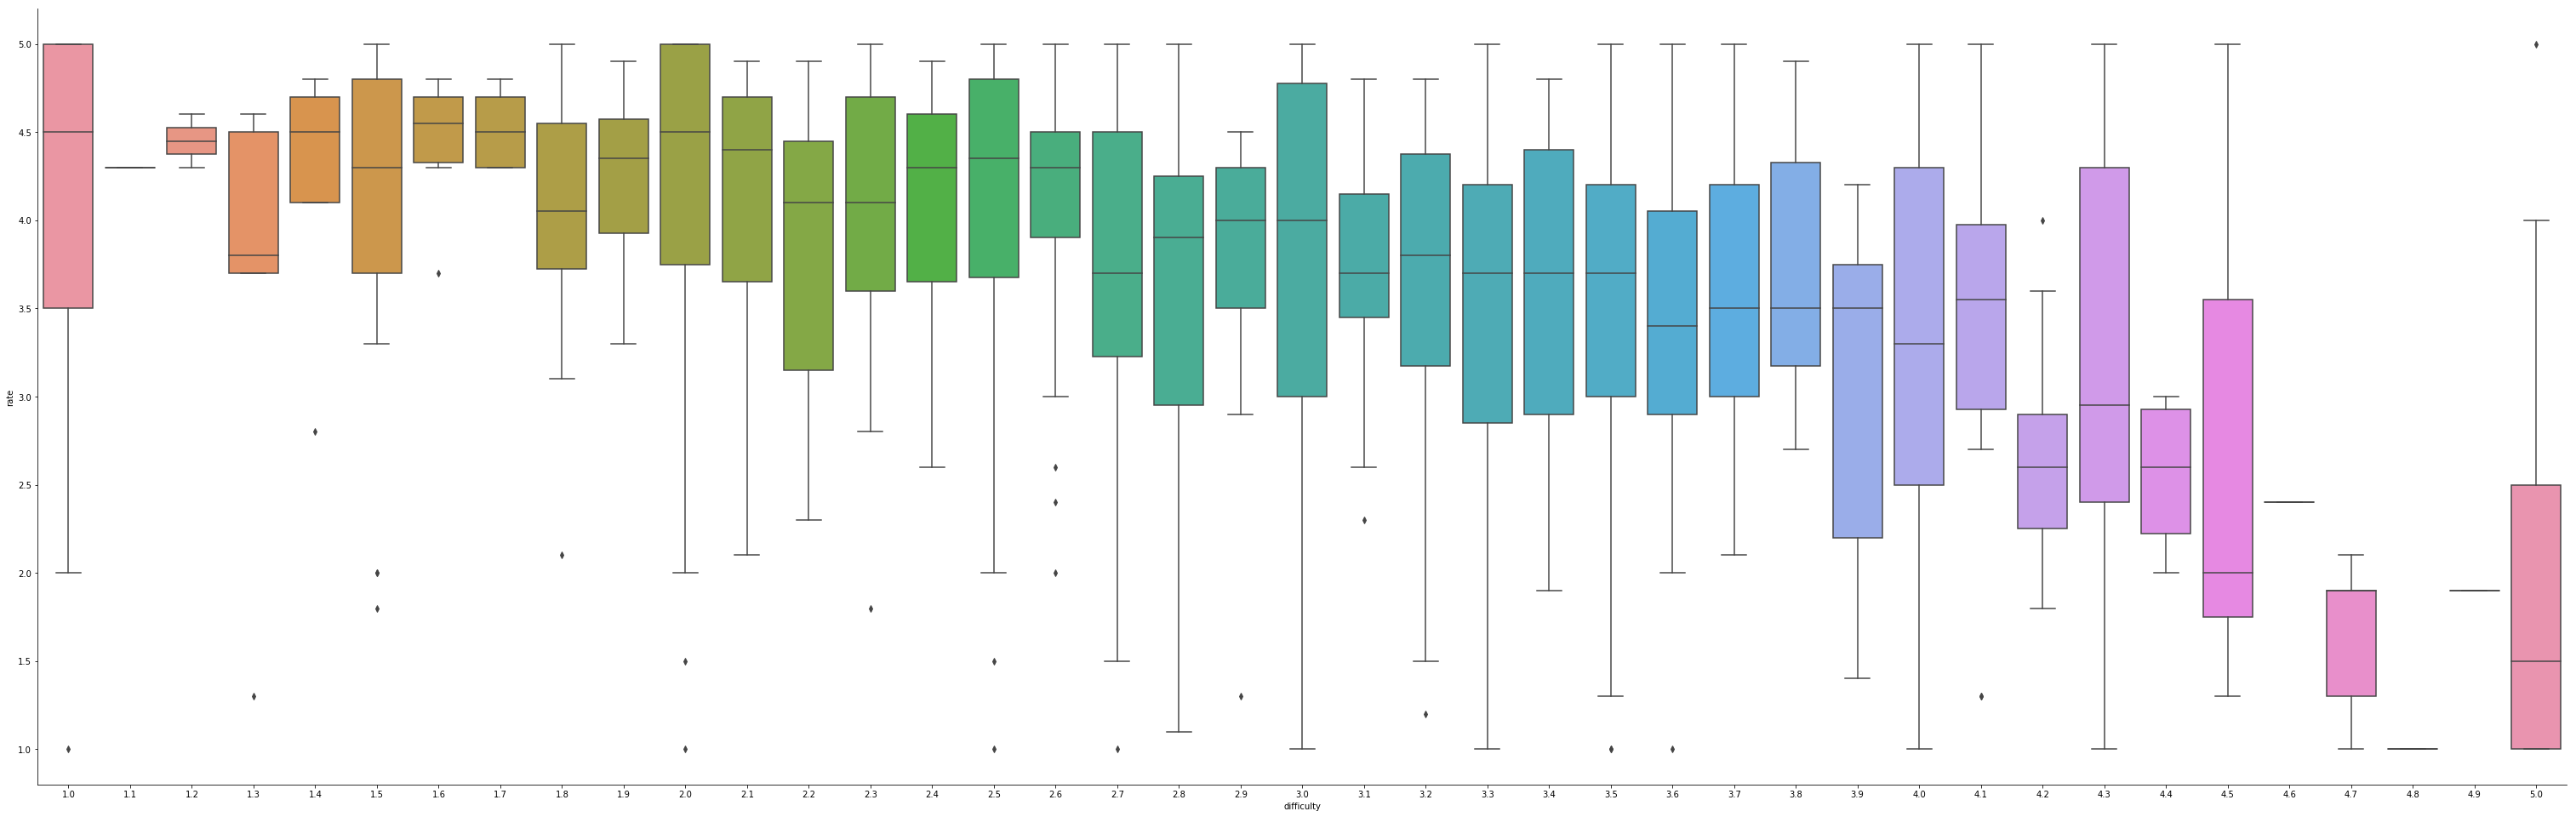

In [153]:
graph = sns.catplot(x="difficulty", y="rate",
            kind="box", dodge=True, data=some2);
graph = graph.fig.set_size_inches(50,15)

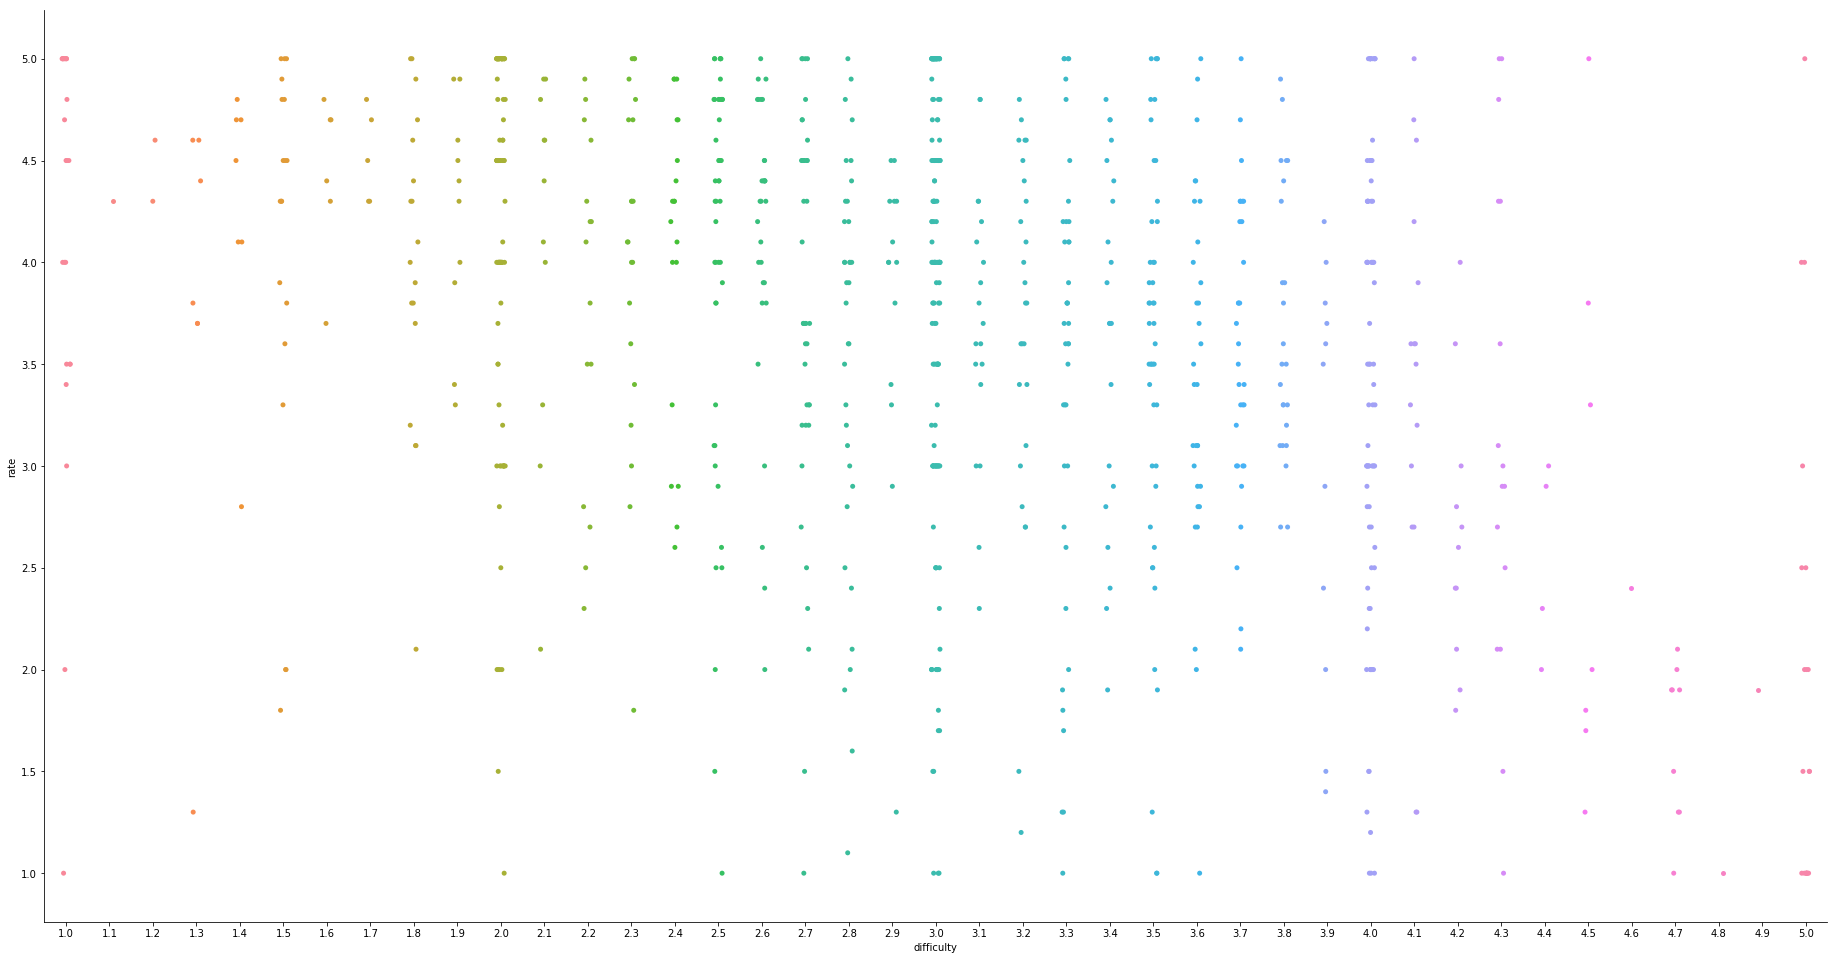

In [154]:
graph = sns.catplot(x="difficulty", y="rate", data=some2)
graph.fig.set_size_inches(30,15)

In [165]:
some3 = some.drop(['name','tags','course','rate','take_again_percentage','difficulty'],axis = 1)
some3.sort_values(by=['department'])
some3 = some3.dropna

In [168]:
proff = some.drop(['name','tags','course','take_again_percentage','difficulty'],axis = 1)
proff =proff.dropna()
proff

,department,rate
0,Communication,3.8
1,International Studies,4.5
2,Humanities,3.8
3,Languages,4.5
4,International Studies,2.5
5,Statistics,2.9
6,Sociology,3.6
7,Anthropology,4.4
9,English,3.0
10,Sociology,2.5


In [170]:
proff= proff.sort_values(by=['department'])
a = lambda x: str(x)
proff['department'] = proff['department'].apply(a)
proff

,department,rate
465,Accounting,1.3
552,Accounting,2.1
779,Accounting,4.0
551,Accounting,3.6
785,Accounting,4.5
235,Accounting,4.5
577,Accounting,2.0
278,Accounting,4.5
544,Accounting,3.0
142,Accounting,3.6


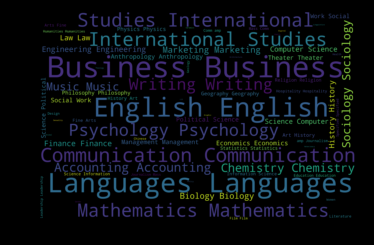

In [173]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = proff.department.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (5, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()